In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/dk/ht9wngxs4r51l9tbk0_y94000000gp/T/ipykernel_61457/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Natural Language Processing

## Learning text representations
When using NLTK classifier, it is noted that the classifer expects dict style feature sets, so we need to transform the text into a dict.
We can use previous TF-IDF. Let's see another implementation:

## Stopwords

These are common words like "the", "a", "an", "in", etc. that don't carry much meaning on their own. While regex can be used to identify these words using patterns, stopwords are usually removed in a separate pre-processing step before applying NLP techniques like bag-of-words and n-grams.

In [2]:
def bag_of_words(words):
        return dict([(word, True) for word in words])

def bag_of_words_not_in_set(words, badwords):
    return bag_of_words(set(words) - set(badwords))

from nltk.corpus import stopwords

def bag_of_non_stopwords(words, stopfile = 'english'):
    badwords = stopwords.words(stopfile)
    return bag_of_words_not_in_set(words, badwords)

bag_of_non_stopwords(['this','is','awesome'])

#nltk.download()   # try to use this is you need some package

{'awesome': True}

In [3]:
#nltk.download()   # try to use this is you need some package
from nltk.corpus import stopwords
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## 5.2 Bag of Words

This is a method where text is represented by a collection of individual words. The order of the words doesn't matter. Regex isn't well-suited for creating a BoW representation as it doesn't capture the overall word frequency.

In [4]:
# First, write a Feature extractor (the following is taken from nltk-trainer package)

# download featx.py (written by Perkins)

from nltk import probability
import math

def bag_of_words(words):
        return dict([(word, True) for word in words])

def bag_of_words_in_set(words, wordset):
        return bag_of_words(set(words) & wordset)
    
def word_counts(words):
        return dict(probability.FreqDist((w for w in words)))

def word_counts_in_set(words, wordset):
        return word_counts((w for w in words if w in wordset))

def train_test_feats(label, instances, featx=bag_of_words, fraction=0.75):
        labeled_instances = [(featx(i), label) for i in instances]
        
        if fraction != 1.0:
                l = len(instances)
                cutoff = int(math.ceil(l * fraction))
                return labeled_instances[:cutoff], labeled_instances[cutoff:]
        else:
                return labeled_instances, labeled_instances

In [5]:
bag_of_words(['this', 'is', 'awesome'])

{'this': True, 'is': True, 'awesome': True}

In [6]:
def bag_of_words_not_in_set(words, badwords):
    return bag_of_words(set(words) - set(badwords))

bag_of_words_not_in_set(['this','is','awesome'],['this'])

{'is': True, 'awesome': True}

## 5.3 N-grams

These are sequences of n words that appear together in a text. Bigrams (2 words) and trigrams (3 words) are common examples. N-grams can capture some context compared to BoW. While you could potentially use regex to extract n-grams with complex patterns, it's generally less efficient than dedicated NLP libraries that handle tokenization and n-gram generation.

In [7]:
import nltk
from nltk.util import bigrams

# Download the stopwords resource (one-time download)
nltk.download('punkt')

# Sample sentence
sentence = "This is a sample sentence for n-gram generation."

# Tokenize the sentence (split into words)
tokens = nltk.word_tokenize(sentence.lower())

# Generate bigrams from the tokens
bigrams = bigrams(tokens)

# Print the bigrams
print(list(bigrams))

[('this', 'is'), ('is', 'a'), ('a', 'sample'), ('sample', 'sentence'), ('sentence', 'for'), ('for', 'n-gram'), ('n-gram', 'generation'), ('generation', '.')]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joaorochaemelo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 5.4 Training a (naive Bayes) Classifier with TextBlob: A Tweet Sentiment Analyzer




We will train a simple sentiment analyzer trained on a small dataset of fake tweets. To begin, we’ll import the text.classifiers and create some training and test data.

https://blog.twitter.com/2012/a-new-barometer-for-the-election

"( Wednesday, August 1, 2012 | By Adam Sharp (@AdamS) [16:00 UTC] ) One glance at the numbers, and it’s easy to see why pundits are already calling 2012 “the Twitter election.” More Tweets are sent every two days today than had ever been sent prior to Election Day 2008 — and Election Day 2008’s Tweet volume represents only about six minutes of Tweets today."

"Each day, the Index evaluates and weighs the sentiment of Tweets mentioning Obama or Romney relative to the more than 400 million Tweets sent on all other topics. For example, a score of 73 for a candidate indicates that Tweets containing their name or account name are on average more positive than 73 percent of all Tweets."

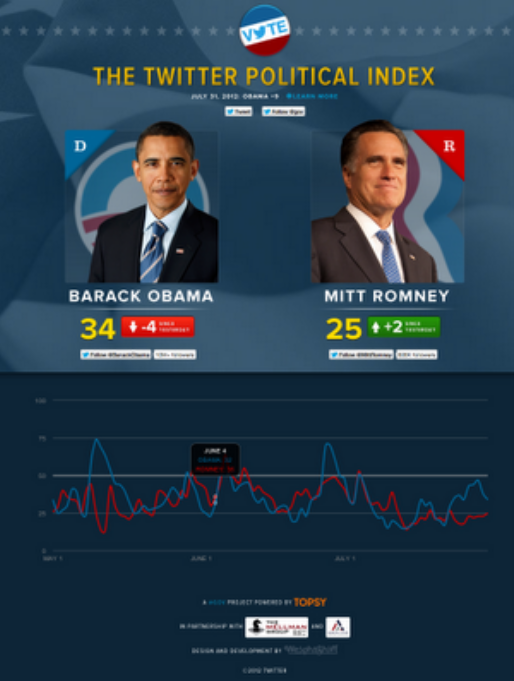

In [8]:
#!pip install -U textblob
#!conda install -c https://conda.anaconda.org/sloria textblob -y

In [9]:
from textblob.classifiers import NaiveBayesClassifier

train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('This is my best work.', 'pos'),
    ("What an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

We create a new classifier by passing training data into the constructor for a NaiveBayesClassifier.



In [10]:
cl = NaiveBayesClassifier(train)
cl.show_informative_features(10)

Most Informative Features
          contains(this) = True              neg : pos    =      2.3 : 1.0
          contains(this) = False             pos : neg    =      1.8 : 1.0
          contains(This) = False             neg : pos    =      1.6 : 1.0
            contains(an) = False             neg : pos    =      1.6 : 1.0
             contains(I) = False             pos : neg    =      1.4 : 1.0
             contains(I) = True              neg : pos    =      1.4 : 1.0
            contains(He) = False             pos : neg    =      1.2 : 1.0
            contains(My) = False             pos : neg    =      1.2 : 1.0
          contains(What) = False             neg : pos    =      1.2 : 1.0
         contains(about) = False             neg : pos    =      1.2 : 1.0


We can now classify arbitrary text using the NaiveBayesClassifier.classify(text) method.

In [11]:
print(cl.classify("Their burgers are amazing"))  # "pos"
print(cl.classify("I don't like their pizza."))  # "neg"

pos
neg


Another way to classify strings of text is to use TextBlob objects. You can pass classifiers into the constructor of a TextBlob.

TextBlob -> Super Cool package by the way


In [12]:
import textblob
blob = textblob.TextBlob("The beer was amazing. "
                "But the hangover was horrible. My boss was not happy.", classifier=cl)
print (blob)

The beer was amazing. But the hangover was horrible. My boss was not happy.


You can then call the classify() method on the blob.



In [13]:
blob.classify()  # "neg"

'neg'

You can also take advantage of TextBlob’s sentence tokenization and classify each sentence indvidually.

In [14]:
for sentence in blob.sentences:
    print(sentence)
    print(sentence.classify())
# "pos", "neg", "neg"

cl.accuracy(test)  

The beer was amazing.
pos
But the hangover was horrible.
neg
My boss was not happy.
neg


0.8333333333333334

We can improve our classifier by adding more training and test data. Here we’ll add data from the movie review corpus which was downloaded with NLTK.



In [15]:
nltk.download('movie_reviews')
import random
from nltk.corpus import movie_reviews

reviews = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(reviews)

new_train, new_test = reviews[0:300], reviews[301:400]

print('Review:' )
print(' '.join(new_train[0][0]))
print("\nSentiment: "+ new_train[0][1])

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/joaorochaemelo/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Review:
an experience like baby geniuses can have certain effects on an average moviegoer . you may be scarred for life after seeing this petrified piece of garbage , which is so disarmingly horrible that it may cause you to ponder it ' s hollywood existence . when i think of the screenwriters behind this film , i picture a room full of monkeys . the monkeys are pounding on their typewriters while scratching themselves . all of the monkeys combine their efforts , hop in a cab and take the finished product downtown to director bob clark ' s office . the designated monkey explains the plot by jumping up and down on clark ' s desk while flailing his arms and shrieking . the director appears to be deep in thought , until he slams his fist down on the desktop and exclaims ` i love it ! ! ! ' the writing behind this project is embarrassing . for your amusement , i will explain the plot . dr . kinder ( kathleen turner ) and dr . heep ( christopher lloyd ) are two of the cold - hearted executi

Let’s see what one of these documents looks like.



In [16]:
print(new_train[0])

(['an', 'experience', 'like', 'baby', 'geniuses', 'can', 'have', 'certain', 'effects', 'on', 'an', 'average', 'moviegoer', '.', 'you', 'may', 'be', 'scarred', 'for', 'life', 'after', 'seeing', 'this', 'petrified', 'piece', 'of', 'garbage', ',', 'which', 'is', 'so', 'disarmingly', 'horrible', 'that', 'it', 'may', 'cause', 'you', 'to', 'ponder', 'it', "'", 's', 'hollywood', 'existence', '.', 'when', 'i', 'think', 'of', 'the', 'screenwriters', 'behind', 'this', 'film', ',', 'i', 'picture', 'a', 'room', 'full', 'of', 'monkeys', '.', 'the', 'monkeys', 'are', 'pounding', 'on', 'their', 'typewriters', 'while', 'scratching', 'themselves', '.', 'all', 'of', 'the', 'monkeys', 'combine', 'their', 'efforts', ',', 'hop', 'in', 'a', 'cab', 'and', 'take', 'the', 'finished', 'product', 'downtown', 'to', 'director', 'bob', 'clark', "'", 's', 'office', '.', 'the', 'designated', 'monkey', 'explains', 'the', 'plot', 'by', 'jumping', 'up', 'and', 'down', 'on', 'clark', "'", 's', 'desk', 'while', 'flailing'

We can now update our classifier with the new training data using the update(new_data) method, as well as test it using the larger test dataset.



In [17]:
cl.update(new_train) # it takes a while
accuracy = cl.accuracy(new_test) 
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.7676767676767676


Here’s the full, updated script:



In [18]:
import re

train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('This is my best work.', 'pos'),
    ("What an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

processed_features = []
def clean_text(data):
    for sentence in range(0, len(data)):  
        # Remove all the special characters
        processed_feature = re.sub(r'\W', ' ', str(data[sentence][0]))

        # remove all single characters
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        # Remove single characters from the start
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        # Removing prefixed 'b'
        processed_feature = re.sub(r'^b\s+', '', processed_feature)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()

        data[sentence] = (processed_feature,data[sentence][1])
    return data

In [19]:
train_clean = clean_text(train)
test_clean = clean_text(test)

cl = NaiveBayesClassifier(train_clean)
accuracy = cl.accuracy(test_clean)
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.8333333333333334


## 5.6 All together: News clustering example

In [20]:
import pandas as pd

# corpus of 120k news headlines, here shortened to 10k
all_news = pd.read_csv('data/news.csv')
all_news.head()

,news
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...
1,American Phil Mickelson registered a 59 to win...
2,French President Jacques Chirac and British Pr...
3,"As many as 15,000 New Zealanders will be force..."
4,The group led by al Qaeda ally Abu Musab al-Z...


In [21]:
all_news.shape

(10000, 1)

In [22]:
all_news.iloc[2]['news']

'French President Jacques Chirac and British Prime Minister Tony Blair maintained Thursday that relations between their countries were not strained by their disagreements over the Iraq war, as evidenced by their cooperation on a number of international '

In [23]:
# same process as before, but for all lines
#tokenize, lowercase, remove punctuation
from nltk.tokenize import word_tokenize

def tokenizer_and_remove_punctuation(row):
  tokens = word_tokenize(row['news'])
  return [word.lower() for word in tokens if word.isalpha()]

all_news['tokenized'] = all_news.apply(tokenizer_and_remove_punctuation,axis=1)
all_news.head()

,news,tokenized
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...,"[san, francisco, dell, said, thursday, its, pr..."
1,American Phil Mickelson registered a 59 to win...,"[american, phil, mickelson, registered, a, to,..."
2,French President Jacques Chirac and British Pr...,"[french, president, jacques, chirac, and, brit..."
3,"As many as 15,000 New Zealanders will be force...","[as, many, as, new, zealanders, will, be, forc..."
4,The group led by al Qaeda ally Abu Musab al-Z...,"[the, group, led, by, al, qaeda, ally, abu, mu..."


In [24]:
# lemmatize with part of speech helpers
nltk.download('wordnet') # wordnet is the most well known lemmatizer for english
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# unfortunately pos_tag and lemmatize use different codes for parts of speech
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() # gets first letter of POS categorization
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) # get returns second argument if first key does not exist

lemmatizer = WordNetLemmatizer()

def lemmatizer_with_pos(row):
  return [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in row['tokenized']]

all_news['lemmatized'] = all_news.apply(lemmatizer_with_pos,axis=1)
all_news.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joaorochaemelo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/joaorochaemelo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,news,tokenized,lemmatized
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...,"[san, francisco, dell, said, thursday, its, pr...","[san, francisco, dell, say, thursday, it, prof..."
1,American Phil Mickelson registered a 59 to win...,"[american, phil, mickelson, registered, a, to,...","[american, phil, mickelson, register, a, to, w..."
2,French President Jacques Chirac and British Pr...,"[french, president, jacques, chirac, and, brit...","[french, president, jacques, chirac, and, brit..."
3,"As many as 15,000 New Zealanders will be force...","[as, many, as, new, zealanders, will, be, forc...","[a, many, a, new, zealander, will, be, force, ..."
4,The group led by al Qaeda ally Abu Musab al-Z...,"[the, group, led, by, al, qaeda, ally, abu, mu...","[the, group, lead, by, al, qaeda, ally, abu, m..."


In [25]:
# remove stopwords

def remove_sw(row):
  return list(set(row['lemmatized']).difference(stopwords.words()))

all_news['no_stopwords'] = all_news.apply(remove_sw,axis=1)
all_news.head()

,news,tokenized,lemmatized,no_stopwords
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...,"[san, francisco, dell, said, thursday, its, pr...","[san, francisco, dell, say, thursday, it, prof...","[pc, year, thursday, earlier, maker, profit, f..."
1,American Phil Mickelson registered a 59 to win...,"[american, phil, mickelson, registered, a, to,...","[american, phil, mickelson, register, a, to, w...","[slam, birdie, mickelson, master, miss, regist..."
2,French President Jacques Chirac and British Pr...,"[french, president, jacques, chirac, and, brit...","[french, president, jacques, chirac, and, brit...","[jacques, thursday, blair, strain, disagreemen..."
3,"As many as 15,000 New Zealanders will be force...","[as, many, as, new, zealanders, will, be, forc...","[a, many, a, new, zealander, will, be, force, ...","[stroke, risk, form, find, force, recall, viox..."
4,The group led by al Qaeda ally Abu Musab al-Z...,"[the, group, led, by, al, qaeda, ally, abu, mu...","[the, group, lead, by, al, qaeda, ally, abu, m...","[web, group, statement, abu, lead, mosul, qaed..."


In [26]:
# put all this cleaning together

def re_blob(row):
  return " ".join(row['no_stopwords'])

all_news['clean_blob'] = all_news.apply(re_blob,axis=1)
all_news.head()

,news,tokenized,lemmatized,no_stopwords,clean_blob
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...,"[san, francisco, dell, said, thursday, its, pr...","[san, francisco, dell, say, thursday, it, prof...","[pc, year, thursday, earlier, maker, profit, f...",pc year thursday earlier maker profit francisc...
1,American Phil Mickelson registered a 59 to win...,"[american, phil, mickelson, registered, a, to,...","[american, phil, mickelson, register, a, to, w...","[slam, birdie, mickelson, master, miss, regist...",slam birdie mickelson master miss register gra...
2,French President Jacques Chirac and British Pr...,"[french, president, jacques, chirac, and, brit...","[french, president, jacques, chirac, and, brit...","[jacques, thursday, blair, strain, disagreemen...",jacques thursday blair strain disagreement pre...
3,"As many as 15,000 New Zealanders will be force...","[as, many, as, new, zealanders, will, be, forc...","[a, many, a, new, zealander, will, be, force, ...","[stroke, risk, form, find, force, recall, viox...",stroke risk form find force recall vioxx found...
4,The group led by al Qaeda ally Abu Musab al-Z...,"[the, group, led, by, al, qaeda, ally, abu, mu...","[the, group, lead, by, al, qaeda, ally, abu, m...","[web, group, statement, abu, lead, mosul, qaed...",web group statement abu lead mosul qaeda behea...


In [27]:
#let's take only the most common 1000 words
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer(max_features=1000)

# fit creates one entry for each different word seen
X = bow_vect.fit_transform(all_news['clean_blob']).toarray()

In [28]:
as_df = pd.DataFrame(X,columns=bow_vect.get_feature_names_out())
as_df.head()

,abu,abuse,access,accord,account,accounting,accuse,acquire,acquisition,act,...,worth,wound,yahoo,yankee,yard,yasser,year,yesterday,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=100)
kmeans.fit(X)
pred = kmeans.predict(X)

In [30]:
pred

array([5, 5, 2, ..., 5, 5, 5], dtype=int32)

In [31]:
predict_df = pd.concat([all_news['news'],pd.DataFrame(pred,columns=['class'])],axis=1)
predict_df.head()

,news,class
0,SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thurs...,5
1,American Phil Mickelson registered a 59 to win...,5
2,French President Jacques Chirac and British Pr...,2
3,"As many as 15,000 New Zealanders will be force...",5
4,The group led by al Qaeda ally Abu Musab al-Z...,1


In [32]:
pd.set_option('display.max_colwidth', None)

In [33]:
#sports
predict_df[predict_df['class']==0]

,news,class
467,"Israeli Prime Minister Ariel Sharon is not known for a kindly disposition toward the Palestinians, nor for a gentle approach to the issue of a Palestinian state.",0
526,"An Israeli helicopter fired three missiles\at an unknown target in a Gaza refugee camp on Wednesday,\Palestinian witnesses said, one day after militants killed 16\Israelis in bus bombings in southern Israel.",0
550,"TWO Palestinian women, who planned to blow themselves up in a double suicide bombing in Tel Aviv, gave themselves up to Israeli troops at a West Bank checkpoint, Israeli military sources said today.",0
814,Israeli troops mistook three Egyptian police officers for Palestinian militants and shot them dead yesterday along the Gaza Strip #39;s border,0
822,Israel's High Court said on Thursday it was upholding a decision by the country's attorney-general to drop a bribery case against Prime Minister Ariel Sharon.,0
...,...,...
9771,"Palestinian leader Mahmoud Abbas called\Israel ""the Zionist enemy"" Tuesday, unprecedented language for\the relative moderate who is expected to succeed Yasser Arafat.",0
9824,JERUSALEM : The Israeli cabinet was set to approve a package of compensation for settlers who are to be uprooted from their homes as part of Prime Minister Ariel Sharon #39;s Gaza pullout plan.,0
9919,"JERUSALEM : Beleaguered Israeli Prime Minister Ariel Sharon persisted with plans to form a new government including the main opposition Labour party, bolstered by Washington #39;s backing for the expansion of West Bank settlements.",0
9948,Israel #39;s cabinet will today decide on a bill that would set out how to implement prime minister Ariel Sharon #39;s plan to withdraw Israeli settlers from the Gaza Strip.,0


In [34]:
#world
predict_df[predict_df['class']==1]

,news,class
4,"The group led by al Qaeda ally Abu Musab al-Zarqawi said it beheaded two Iraqi soldiers in broad daylight in Mosul, a statement found on an Islamist Web site on Friday said.",1
23,"Indonesian police on Saturday released security camera images of a truck bombing outside the Australian Embassy, and investigators found traces of explosives in a room rented by two Malaysian militants wanted in the blast. Also Saturday, around 1,000 members of a hardline Muslim group rallied in downtown Jakarta against Thursday's attack, which killed nine people, two of them suspected suicide bombers...",1
31,"JERUSALEM: Syria is directly involved in terrorism and will not be granted immunity by Israel, the deputy defence minister said on Monday, but stopped short of claiming formal responsibility for the killing of a Hamas leader in Damascus.",1
53,"Turkish television stations broadcast a video Friday that claimed that Habib Akdas, suspected leader of the Turkish al-Qaida cell blamed for November suicide bombings in Istanbul, was killed this week in a US bombing raid in Iraq.",1
59,"The body of an Egyptian who was kidnapped in Iraq last month has been found in northern Iraq, Iraqi police said on Sunday.",1
...,...,...
9931,Iraqi environment minister Mishkat\Moumin said she survived a suicide car bomb attack in Baghdad\on Tuesday that killed four of her bodyguards.,1
9940,"TWO truck drivers from Bangladesh and Sri Lanka kidnapped in Iraq by the same militant group that claims to be holding two French journalists have been released by their captors, officials said today.",1
9946,": Suspected Muslim insurgents attacked an army unit protecting Buddhist monks at a monastery early Friday, killing one of the soldiers as sectarian violence continued in southern Thailand, police said.",1
9949,Several workers are believed to have been killed and others injured after a contruction site collapsed at Dubai airport. The workers were trapped under rubble at the site of a \$4.,1


In [35]:
#global sports
predict_df[predict_df['class']==4]

,news,class
11,Stocks moved higher Friday as a stronger than expected retail sales report showed that higher oil prices aren't scaring consumers away from spending. Federal Reserve Chairman Alan Greenspan's positive comments on oil prices also encouraged investors...,4
78,"Gas prices have eased up a bit over the past couple of months, but they are still more than 30 cents higher than a year ago. Which is why price-sensitive motorists are flocking to the Internet to find cheap #151; or at least cheaper #151; gasoline.",4
97,"SYDNEY (Dow Jones)--Citing a continuation in rising fuel prices, Australia #39;s Qantas Airways Ltd. (QAN.AU) said Friday it will increase its passenger fuel surcharge for a second time in two months.",4
108,"Prices of liquid-crystal displays are expected to fall by less than 5 percent in the fourth quarter as the industry expects a surge in demand during the holiday-shopping season, a research firm said Tuesday.",4
119,"U.S. Treasuries rallied early Monday, compressing yields to their lowest levels in nearly seven months, as record high crude oil prices pressured equities and threatened to be a drag on world economic growth.",4
...,...,...
9869,Federal Reserve Chairman Alan Greenspan said yesterday that higher oil prices have had a quot;noticeable quot; affect on the US economy this year but are not likely to cause serious damage unless they move significantly higher.,4
9881,"The dollar staged a broad-based rally Monday and oil prices slid, boosting shares in some Asian power and exporter companies, but many investors struggled for direction on the first trading day of 2005.",4
9890,"Australia #39;s S amp;P/ASX 200 Index had its biggest drop in three months, led by BHP Billiton, on concern record high oil prices will slow global economic growth and demand for commodities.",4
9928,"OPEC oil producers and Chancellor\Schroeder of Germany, which is a prominent consumer, agree that\the remorseless rise in the price of crude has so far had\little impact on global economic growth.",4


In [36]:
#global sports
predict_df[predict_df['class']==5]

,news,class
0,"SAN FRANCISCO (CBS.MW) -- Dell Inc. said Thursday its third-quarter profit rose 25 percent from a year earlier as the No. 1 personal-computer maker boosted sales of its PCs, laptops and other gear by 18 percent.",5
1,"American Phil Mickelson registered a 59 to win the Grand Slam of Golf in Kauai, Hawaii. The Masters champion had an eagle putt on the 18th for a record 58 but missed and tapped in for a birdie and a 59, equalling the lowest score in stroke-play history.",5
3,"As many as 15,000 New Zealanders will be forced to find an alternative form of pain relief after the worldwide recall of the drug Vioxx, which has been found to double the risk of heart attacks and strokes.",5
5,"The number of US call centers is expected to decline through 2008, with Canada getting many of the jobs the US will lose, a research firm said Friday.",5
6,"PITCHING: Braves left-hander Mike Hampton, already pitching with a bad knee, had to leave the game with one out in the seventh inning when his left forearm tightened.",5
...,...,...
9995,A business columnist at the Seattle Times in the United States has resigned after admitting he copied the work of other journalists.,5
9996,"Washington shrugged off harsh verbal attacks from North Korea against US President George W. Bush, saying that the insults would not hinder efforts to end nuclear crisis on the peninsula.",5
9997,"Alicia Molik came back to beat French teen Tatiana Golovin 3-6, 6-4, 6-4 in the SEAT Open quarterfinals Friday, moving closer to winning her second WTA Tour title in two weeks.",5
9998,"Ecuador upset Brazil 1-0 Wednesday to send the World Cup champions to their first loss in qualifying for the 2006 tournament, and China was eliminated on the fifth tiebreaker despite a 7-0 victory over visiting Hong Kong.",5


In [37]:
## If there is time - Ask GenAI to classify these comments into something

In [38]:
#TO ADD: PCA

In [39]:
#TO ADD: TF-IDF